In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
import os
import subprocess
subprocess.check_output("pwd", shell=True)

b'/home/eip/Documents/oldDocuments/School/CS210/RECIT\n'

In [31]:
deco = pd.read_csv('../Project/yeniEco.csv')

In [32]:
deco = deco.drop(['Time Code', 'Series Code', 'Series Name'], axis=1)


In [33]:
df = pd.read_csv('../Project/database.csv', low_memory=False)

In [34]:
deco = deco[deco.Time >= 1980.0]
deco = deco[deco.Time <=2014]
deco['United States [USA]'] = deco['United States [USA]'].astype(np.float64)
deco

,Time,United States [USA]
20,1980.0,-0.244596
21,1981.0,2.594470
22,1982.0,-1.910891
23,1983.0,4.632457
24,1984.0,7.259087
25,1985.0,4.238738
26,1986.0,3.511614
27,1987.0,3.461748
28,1988.0,4.203972
29,1989.0,3.680524


In [35]:
df = df.drop(['Agency Code', 'Agency Name', 'Agency Type', 'Victim Ethnicity', 'Perpetrator Race', 'Perpetrator Sex', 'Victim Sex', 'Victim Race', 'Perpetrator Ethnicity', 'Relationship', 'Victim Count', 'Perpetrator Count', 'Crime Type', 'City', 'State', 'Crime Solved'], axis=1)
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
df.columns = cols
cols

Index(['Record_ID', 'Year', 'Month', 'Incident', 'Victim_Age',
       'Perpetrator_Age', 'Weapon', 'Record_Source'],
      dtype='object')

In [36]:
df = df[df.Perpetrator_Age != "0"]

In [37]:
df

,Record_ID,Year,Month,Incident,Victim_Age,Perpetrator_Age,Weapon,Record_Source
0,1,1980,January,1,14,15,Blunt Object,FBI
1,2,1980,March,1,43,42,Strangulation,FBI
3,4,1980,April,1,43,42,Strangulation,FBI
5,6,1980,May,1,30,36,Rifle,FBI
6,7,1980,May,2,42,27,Knife,FBI
7,8,1980,June,1,99,35,Knife,FBI
9,10,1980,June,3,38,40,Firearm,FBI
11,12,1980,July,2,20,49,Shotgun,FBI
12,13,1980,July,3,36,39,Blunt Object,FBI
13,14,1980,August,1,20,49,Fall,FBI


In [38]:
df.describe()

,Record_ID,Year,Incident,Victim_Age
count,422127.000000,422127.000000,422127.000000,422127.000000
mean,313098.097212,1995.476188,20.561568,33.980958
std,186569.200470,10.033248,90.546288,32.343707
min,1.000000,1980.000000,0.000000,0.000000
25%,148498.500000,1987.000000,1.000000,22.000000
50%,310119.000000,1994.000000,2.000000,30.000000
75%,475775.500000,2004.000000,7.000000,42.000000
max,638454.000000,2014.000000,999.000000,998.000000


In [39]:
deco.describe()

,Time,United States [USA]
count,35.000000,35.000000
mean,1997.000000,2.643494
std,10.246951,1.978295
min,1980.000000,-2.775530
25%,1988.500000,1.782349
50%,1997.000000,2.745857
75%,2005.500000,3.916762
max,2014.000000,7.259087


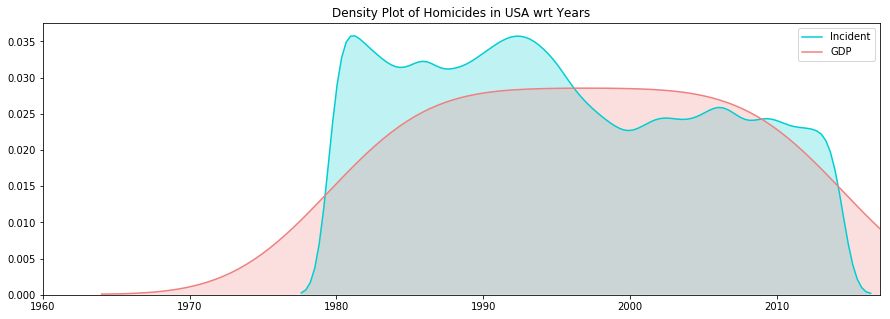

In [40]:
plt.figure(figsize=(15,5))
sns.kdeplot(df["Year"], color="darkturquoise", shade=True)
sns.kdeplot(deco["Time"], color="lightcoral", shade=True)
plt.legend(['Incident', 'GDP'])
plt.title('Density Plot of Homicides in USA wrt Years')
plt.xlim(1960,2017)

plt.show()

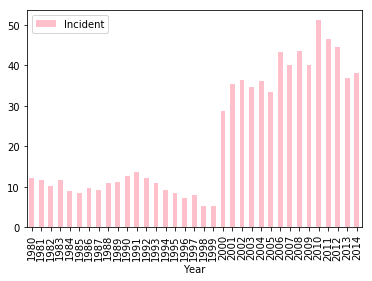

In [41]:
compare_attr = 'Year'
df_pclass = df[[compare_attr, 'Incident']].groupby(compare_attr).mean()
df_pclass.plot.bar(color="pink")

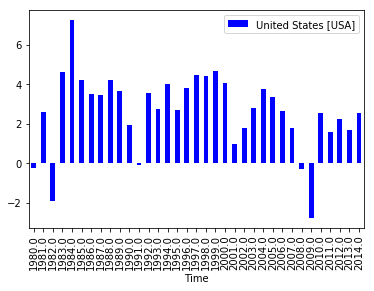

In [42]:
compare_attr = 'Time'
deco_pclass = deco[[compare_attr, 'United States [USA]']].groupby(compare_attr).mean()
deco_pclass.plot.bar(color="blue")

In [43]:
freq = pd.crosstab(index=[df['Incident']], columns=df['Year'])
freq

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Incident,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,0,2,1,0
1,7410,6881,7042,6505,6333,6517,6705,6288,5910,5997,...,5282,5292,5233,4950,5452,5175,5166,5096,5049,4897
2,1750,1776,1791,1621,1528,1579,1688,1568,1448,1529,...,1280,1241,1298,1173,1222,1164,1130,1150,1071,1079
3,922,923,868,797,755,801,874,759,772,821,...,619,632,657,560,599,569,550,573,518,550
4,629,628,572,511,481,548,558,525,490,532,...,435,418,433,336,394,375,379,376,352,370
5,460,428,414,413,338,396,433,381,352,408,...,319,314,298,276,267,290,247,278,241,232
6,360,355,307,303,289,280,338,320,300,313,...,226,251,253,209,227,196,193,207,199,194
7,295,293,280,228,226,236,261,251,255,254,...,197,198,196,157,174,163,176,171,157,149
8,240,252,232,210,200,223,222,212,212,235,...,171,151,161,141,142,135,131,135,127,136


In [44]:
import scipy.stats as stats
chi_stats = stats.chi2_contingency(freq)
chi_stats

(47968.448225200693,
 0.0,
 33966,
 array([[  3.45500288e-01,   3.28060039e-01,   3.12602605e-01, ...,
           2.11116560e-01,   2.01095879e-01,   2.01820779e-01],
        [  7.79479360e+03,   7.40132608e+03,   7.05259265e+03, ...,
           4.76297725e+03,   4.53690178e+03,   4.55325617e+03],
        [  1.87076889e+03,   1.77633576e+03,   1.69263891e+03, ...,
           1.14312580e+03,   1.08886715e+03,   1.09279224e+03],
        ..., 
        [  3.45500288e-01,   3.28060039e-01,   3.12602605e-01, ...,
           2.11116560e-01,   2.01095879e-01,   2.01820779e-01],
        [  3.45500288e-01,   3.28060039e-01,   3.12602605e-01, ...,
           2.11116560e-01,   2.01095879e-01,   2.01820779e-01],
        [  2.68722446e-01,   2.55157808e-01,   2.43135360e-01, ...,
           1.64201769e-01,   1.56407906e-01,   1.56971717e-01]]))

In [45]:
alpha = 0.05
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
df = chi_stats[2]) #degree of freedom
critical_value

34395.844846573949

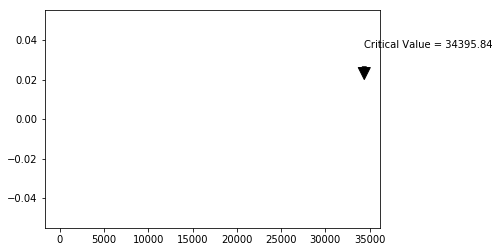

In [46]:
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04),
arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

,Record_ID,Year,Incident,Victim_Age
Record_ID,1.000000,0.997347,0.125769,0.026628
Year,0.997347,1.000000,0.133462,0.028082
Incident,0.125769,0.133462,1.000000,-0.001230
Victim_Age,0.026628,0.028082,-0.001230,1.000000


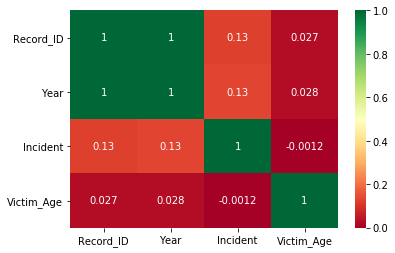

In [47]:
corr = df.corr()
sns.heatmap(corr, annot=True, cbar=True, cmap="RdYlGn")
corr

In [48]:
freq2 = pd.crosstab(index=[deco['United States [USA]']], columns=deco['Time'])
freq2

Time,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
United States [USA],,,,,,,,,,,,,,,,,,,,,
-2.775530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
-1.910891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.291621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
-0.244596,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.074085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.975982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.601455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1.677332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1.778570,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
import scipy.stats as stats
chi_stat = stats.chi2_contingency(freq2)
chi_stat

(1190.0000000000005,
 0.23757566509339403,
 1156,
 array([[ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143],
        [ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143],
        [ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143],
        ..., 
        [ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143],
        [ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143],
        [ 0.02857143,  0.02857143,  0.02857143, ...,  0.02857143,
          0.02857143,  0.02857143]]))

In [50]:
alpha = 0.05
critical_value2 = crit2 = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
df = chi_stat[2]) #degree of freedom
critical_value2

1236.2105280001003

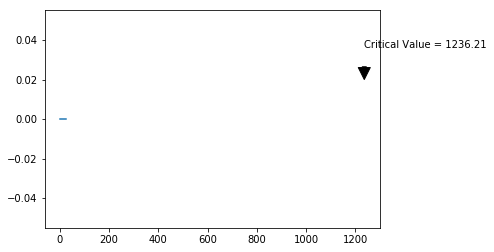

In [51]:
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value2, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value2), xy=(critical_value2, 0.02), xytext=(critical_value2, 0.04),
arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value2, facecolor='red', interpolate=True)

,Time,United States [USA]
Time,1.000000,-0.216018
United States [USA],-0.216018,1.000000


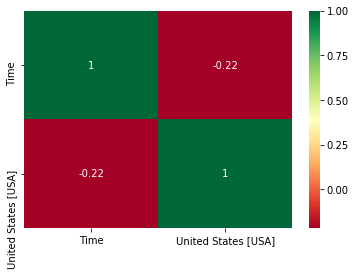

In [52]:
corr2 = deco.corr()
sns.heatmap(corr2, annot=True, cbar=True, cmap="RdYlGn")
corr2

0